25. Класс – целочисленный вектор фиксированной размерности. Методы – сумма, разность, скалярное произведение векторов. Поля – размерность вектора, координаты вектора.

In [1]:
class Vector:
    def __init__(self, vector: list) -> None:
        self.vector = vector
        self.vector_module = self.module(vector)

    def __sub__(self, other):
        assert len(self.vector) == len(other), "Shape of vectors are not similar!"
        vector_ = []
        for first_element, second_element in zip(self.vector, other):
            vector_.append(first_element - second_element)

        return Vector(vector_)

    def __add__(self, other):
        assert len(self.vector) == len(other), "Shape of vectors are not similar!"
        vector_ = []
        for first_element, second_element in zip(self.vector, other):
            vector_.append(first_element + second_element)

        return Vector(vector_)

    def __mul__(self, other):
        assert len(self.vector) == len(other), "Shape of vectors are not similar!"
        vector_ = []
        for first_element, second_element in zip(self.vector, other):
            vector_.append(first_element * second_element)

        return Vector(vector_)

    def __matmul__(self, other) -> float:
        return sum(first_coord * second_coord for first_coord, second_coord in zip(self.vector, other))

    def __len__(self) -> int:
        return len(self.vector)

    def __iter__(self):
        for coord in self.vector:
            yield coord

    def __str__(self) -> str:
        return f'Vector: {self.vector}'

    def module(self, vector) -> int:
        return sum(coord ** 2 for coord in vector) ** 0.5


In [2]:
a = Vector([1, 2, 3])
b = Vector([4, 5, 6])
print(a + b)
print(a - b)
print(a @ b)

Vector: [5, 7, 9]
Vector: [-3, -3, -3]
32


26. Опишите класс `Date`, заданный тремя атрибутами для года, месяца и дня. Включите в описание класса методы, позволяющие вычислить дату следующего дня, определить, сколько дней осталось до конца месяца, и свойство, позволяющее выяснить, является ли год високосным.

In [3]:
class Date:
    def __init__(self, year: int, month: int, day: int) -> None:
        self.year = year
        self.month = month
        self.day = day

        self.calendar_ = [
            31, 28, 31,
            30, 31, 30,
            31, 31, 30,
            31, 30, 31
        ]

    def check_leap_year(self):
        leap_flag = True
        if self.year % 4 != 0:
            leap_flag = False

        if self.year % 100 == 0:
            leap_flag = False

        if leap_flag:
            self.calendar_[1] = 29

        return leap_flag


    def next_day(self):
        max_day = self.calendar_[self.month - 1]
        if self.day < max_day:
            self.day += 1

        elif self.day == max_day:
            if self.month != 12:
                self.day = 1
                self.month += 1

            else:
                self.day = 1
                self.month = 1
                self.year += 1

        return Date(self.year, self.month, self.day)

    def estimated_days(self) -> int:
        return self.calendar_[self.month - 1] - self.day

    def __str__(self) -> str:
        return f'Date: {self.day}.{self.month}.{self.year}'

In [4]:
now = Date(2024, 12, 30)
# print(now.next_day())
print(now.check_leap_year())
print(now.estimated_days())

True
1


27. Создайте класс ТЕЛО с методами вычисления площади поверхности и объема, а также методом, выводящим информацию о фигуре на экран. Создайте дочерние классы ПАРАЛЛЕЛЕПИПЕД, ШАР, ПИРАМИДА со своими методами вычисления площади и объема. Создайте список $n$ фигур и выведите полную информацию о фигурах на экран.

In [54]:
class Body:
    def __init__(self, *args):
        self.coordinates = args
    
    @classmethod
    def area(self):
        ...
    
    @classmethod
    def __str__(self):
        ...

In [73]:
class Parallelepiped(Body):
    def __init__(self, a: float, b: float, c: float) -> None:
        self.a = a
        self.b = b
        self.c = c


    def area(self) -> float:
        return 2 * (self.a * self.b + self.a * self.c + self.b * self.c)

    def volume(self) -> float:
        return self.a * self.b * self.c

    def __str__(self) -> str:
        return f'Parallelepiped with size: ({self.a}, {self.b}, {self.c})'

class Ball(Body):
    def __init__(self, radius: float) -> None:
        import math
        self.radius = radius
        self.pi = math.pi

    def volume(self) -> float:
        return 4 / 3 * self.pi * self.radius ** 3

    def area(self) -> float:
        return 4 * self.pi * self.radius ** 2

    def __str__(self) -> str:
        return f'Ball with radius: {self.radius}'

class Piramid(Body):
    def __init__(self, a: float, b: float, h: float) -> None:
        self.a = a
        self.b = b
        self.h = h

    def volumne(self) -> float:
        return self.a * self.b * self.h / 3

    def area(self) -> float:
        from math import tan
        phi = abs(tan(self.h / (self.a / 2)))
        return self.a * self.b * (1 + phi)

    def __str__(self) -> str:
        return f'Piramid with values ({self.a}, {self.b}, {self.h})'


In [74]:
p = Parallelepiped(1, 2, 3)
print(p)
print(p.area())

b = Ball(2)
print(b)
print(b.area())

p = Piramid(1, 2, 4)
print(p)
print(p.area())

Parallelepiped with size: (1, 2, 3)
22
Ball with radius: 2
50.26548245743669
Piramid with values (1, 2, 4)
15.599422910440758


28. <br>а) Найти пересечение двух заданных списков с помощью лямбда- функции. _Пример_: `[1, 2, 3, 5, 7, 8, 9, 10]`, `[1, 2, 4, 8, 9]` → `[1, 2, 8, 9]`.<br>б) Найти список с максимальной и минимальной длиной, используя лямбда-функцию. _Пример_: `[[0], [1, 3], [5, 7], [9, 11], [13, 15, 17]]` → `(3, [13, 15, 17])`, (1, [0]).<br>в) Найти вложенные элементы списков, которые присутствуют в другом списке с помощью лямбда-функции. _Пример_: `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]`, `[[12, 18, 23, 25, 45], [7, 11, 19, 24, 28], [1, 5, 8, 18, 15, 16]]` → `[[12], [7, 11], [1, 5, 8]]`.

In [7]:
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
b = [[12, 18, 23, 25, 45], [7, 11, 19, 24, 28], [1, 5, 8, 18, 15, 16]]
result = list(filter(lambda x: any(i in a for i in x), b))
result

[[12, 18, 23, 25, 45], [7, 11, 19, 24, 28], [1, 5, 8, 18, 15, 16]]

In [71]:
a = [[0], [1, 3], [5, 7], [9, 11], [13, 15, 17]]
print(sorted(a, key=lambda x: len(x))[-1])
print(sorted(a, key=lambda x: len(x))[0])

[13, 15, 17]
[0]


In [72]:
list1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
list2 = [[12, 18, 23, 25, 45], [7, 11, 19, 24, 28], [1, 5, 8, 18, 15, 16]]

result = list(map(lambda x: list(filter(lambda y: y in list1, x)), list2))
print(result)

[[12], [7, 11], [1, 5, 8]]


29. <br>а) Напишите программу для подсчета пар одинаковых значений в двух заданных списках. Используйте функцию `map()`. _Пример_: `[1, 2, 3, 4, 5, 6, 7, 8]`, `[2, 2, 3, 1, 2, 6, 7, 9]` → `4`.<br>б) Сгенерировать список целых чисел. С помощью функции `filter()` выбрать из списка все числа кратные заданному числу и упорядочить их по убыванию. Используя функцию `reduce()`, найти их сумму.

In [8]:
a = [1, 2, 3, 4, 5, 6, 7, 8]
b = [2, 2, 3, 1, 2, 6, 7, 9]
sum(map(lambda x: x in b, a))

5

In [9]:
from random import randint
from functools import reduce
a = [randint(0, 100) for _ in range(100)]
c = 10
a_ = sorted(list(filter(lambda x: x % c == 0, a)))
print(a_)
reduce(lambda x, y: x + y, a_, 0)

[10, 10, 20, 30, 50, 60, 70, 80, 100]


430

30. <br>а) Создайте декоратор, который будет заменять исключения, возникающие при выполнении функции, на заданное значение и логировать эти замены.<br>б) Создайте декоратор, который будет заменять значение аргумента на результат выполнения заданной функции только если оно удовлетворяет определенному условию.

In [10]:
import logging

class CustomExcept(Exception):
    def __str__(self):
        return "Кастомное исключение"

def decor(func):
    def wrapper(*args, **kwargs):
        try:
            a=func()
        except:
            logging.exception("Custom Exception error!")
            raise CustomExcept
    
    return wrapper
@decor
def main(a=0):
    return 1 / a

main()

ERROR:root:Custom Exception error!
Traceback (most recent call last):
  File "/tmp/ipykernel_54437/1038487469.py", line 10, in wrapper
    a=func()
      ^^^^^^
  File "/tmp/ipykernel_54437/1038487469.py", line 18, in main
    return 1 / a
           ~~^~~
ZeroDivisionError: division by zero


CustomExcept: Кастомное исключение

In [56]:
from math import cos

def decor(func):
    def wrapper(*args, **kwargs):
        a = func()
        if a % 3 == 0:
            return func(3 * a)
        return a
    
    return wrapper

@decor
def main(a=3):
    return a

main()

9

31. <br>а) Реализовать функцию-генератор, которая создает все возможные комбинации цветов RGB.
<br>б) Реализовать функцию-генератор, которая создает все возможные варианты расположения элементов на графике.
<br>в) Отфильтровать список строк, оставив только те, которые содержат определенную подстроку, используя выражение-генератор.
<br>г) Создать список всех возможных перестановок элементов заданного списка без повторений, используя выражение-генератор.

In [57]:
def gener_rgb():
    def product(*args, repeat=1):
        pools = [tuple(pool) for pool in args] * repeat
        result = [[]]
        for pool in pools:
            result = [x+[y] for x in result for y in pool]
        for prod in result:
            yield tuple(prod)
    
    for r, g, b in product(range(0, 256), repeat=3):
        yield (r, g, b)

a = gener_rgb()
next(a)
# next(a)

(0, 0, 0)

In [4]:
def generate_elems(l: list):
    def product(*args, repeat=1):
        pools = [tuple(pool) for pool in args] * repeat
        result = [[]]
        for pool in pools:
            result = [x+[y] for x in result for y in pool]
        for prod in result:
            yield tuple(prod)

    def permutations(iterable, r=None):
        pool = tuple(iterable)
        n = len(pool)
        r = n if r is None else r
        for indices in product(range(n), repeat=r):
            if len(set(indices)) == r:
                yield tuple(pool[i] for i in indices)
    for perm in permutations(l):
        yield ' '.join(perm)
r = generate_elems(['a', 'b', 'c', 'd'])
next(r)
next(r)
next(r)

'a c b d'

In [6]:
l = ['apple', 'juice', 'math', 'physics']
print([elem for elem in l if 'h' in elem])

['math', 'physics']


In [8]:
def product(*args, repeat=1):
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)

def permutations(iterable, r=None):
    pool = tuple(iterable)
    n = len(pool)
    r = n if r is None else r
    for indices in product(range(n), repeat=r):
        if len(set(indices)) == r:
            yield tuple(pool[i] for i in indices)
list(permutations(range(3)))

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]

32. Используя модуль `array` и  библиотеку `numpy`, решить следующие задачи:<br>а) Дан массив размера $N$. После каждого отрицательного элемента массива вставить элемент с нулевым значением.<br>б) Дана матрица размера $M×N$. Упорядочить ее столбцы так, чтобы их последние элементы образовывали убывающую последовательность.

In [49]:
import numpy as np
a = np.array([-1, 1, 2, -5, 6, 8])

In [53]:
np.insert(a, np.where(a < 0)[0] + 1, 0)

array([-1,  0,  1,  2, -5,  0,  6,  8])

In [40]:
a = np.array([[1,4],[3,1]])
a

array([[1, 4],
       [3, 1]])

In [43]:
a[:, np.argsort(a[-1, :])[::-1]]

array([[1, 4],
       [3, 1]])

# 33

Задачу решить двумя способами:

1. Реализовать класс стек через использование списка:
   * Создать класс `Stack` с методами:
     - `push(item)`: добавляет элемент `item` в верхушку стека;
     - `pop()`: удаляет и возвращает элемент из верхушки стека;
     - `peek()`: возвращает элемент из верхушки стека без его удаления;
     - `is_empty()`: проверяет, пуст ли стек;
     - `size()`: возвращает текущий размер стека.

2. Реализовать класс стек через связный список:
   * Создать класс `Node` для представления узла связного списка с двумя атрибутами: `data` (значение узла) и `next` (ссылка на следующий узел).

   * Создать класс `Stack` с методами:
     - `push(item)`: добавляет элемент `item` в верхушку стека;
     - `pop()`: удаляет и возвращает элемент из верхушки стека;
     - `peek()`: возвращает элемент из верхушки стека без его удаления;
     - `is_empty()`: проверяет, пуст ли стек;
     - `size()`: возвращает текущий размер стека/

Оба способа реализации должны обеспечивать функциональность стека: добавление элементов в верхушку, удаление элементов из верхушки, получение элемента из верхушки без его удаления, проверку на пустоту и получение текущего размера стека.

In [1]:
class Stack:
    def __init__(self, a: list) -> None:
        self._a = a
    
    def push(self, item) -> None:
        self._a.append(item)
    
    def pop(self):
        last = self._a.pop()
        return last

    def peek(self):
        last = self._a[-1]
        return last
    
    def is_empty(self) -> bool:
        return not bool(len(self._a))

    def size(self) -> int:
        return len(self._a)

    def __str__(self) -> str:
        return f"Stack({self._a})"   

    def __repr__(self) -> str:
        return f"Stack({self._a})"   

In [1]:
class Node:
    def __init__(self, data, next=None) -> None:
        self.value = data
        self.next = next
    
    def __str__(self) -> str:
        return f"Node(value={self.value}, next={self.next})"

In [2]:
a = Node(1, next=Node(2, next=Node(3)))
while a.next:
    a = a.next
    print(a)

Node(value=2, next=Node(value=3, next=None))
Node(value=3, next=None)


2. Реализовать класс стек через связный список:
   * Создать класс `Node` для представления узла связного списка с двумя атрибутами: `data` (значение узла) и `next` (ссылка на следующий узел).

   * Создать класс `Stack` с методами:
     - `push(item)`: добавляет элемент `item` в верхушку стека;
     - `pop()`: удаляет и возвращает элемент из верхушки стека;
     - `peek()`: возвращает элемент из верхушки стека без его удаления;
     - `is_empty()`: проверяет, пуст ли стек;
     - `size()`: возвращает текущий размер стека/

Оба способа реализации должны обеспечивать функциональность стека: добавление элементов в верхушку, удаление элементов из верхушки, получение элемента из верхушки без его удаления, проверку на пустоту и получение текущего размера стека.

In [46]:
class StackNodes:
    def __init__(self, a: Node) -> None:
        self._a = a
    
    def push(self, item) -> None:
        ptr = self._a
        while ptr.next:
            ptr = ptr.next
        ptr.next = Node(item)
    
    def pop(self):
        ptr = self._a
        while ptr.next.next is not None:
            ptr = ptr.next
        last = ptr.next.value
        ptr.next = None
        return last
    
    def peek(self):
        ptr = self._a
        while ptr.next:
            ptr = ptr.next
        return ptr.value
    
    def is_empty(self) -> bool:
        return not bool(self._a.next)
    
    def size(self) -> int:
        size = 1
        ptr = self._a
        while ptr.next:
            size += 1
            ptr = ptr.next
        return size

    def __str__(self) -> str:
        return f"Stack[{self._a}]"
    
    def __repr__(self) -> str:
        return f"Stack[{self._a}]"

In [44]:
s = Stack(Node(10, next=Node(20, next=Node(30))))

s.push(2)
print(s)
print(s.pop())
print(s)
print(s.size())
print(s.peek())

Stack[Node(value=10, next=Node(value=20, next=Node(value=30, next=Node(value=2, next=None))))]
2
Stack[Node(value=10, next=Node(value=20, next=Node(value=30, next=None)))]
3
30


11. Дан стек. Необходимо найти среднее арифметическое всех его элементов

In [51]:
s = Stack([10, 20, 30, 40])
l, a = 0, 0
for _ in range(s.size()):
    l += 1
    a += s.pop()
a / l

25.0

Задачу решить двумя способами:

1. Реализовать класс очередь через использование списка:
   * Создать класс `Queue` с методами:
     - `enqueue(item)`: добавляет элемент `item` в конец очереди;
     - `dequeue()`: удаляет и возвращает элемент из начала очереди;
     - `peek()`: возвращает элемент из начала очереди без его удаления;
     - `is_empty()`: проверяет, пуста ли очередь;
     - `size()`: возвращает текущий размер очереди.

Оба способа реализации должны обеспечивать функциональность очереди: добавление элементов в конец, удаление элементов из начала, получение элемента из начала без его удаления, проверку на пустоту и получение текущего размера очереди.

In [2]:
class Queue:
    def __init__(self, data: list) -> None:
        self._data = data
    
    def enqueue(self, item) -> None:
        self._data.append(item)

    def dequeue(self):
        first = self._data[0]

        del self._data[0]
        return first

    def peek(self):
        first = self._data[0]
        return first
    
    def is_empty(self) -> bool:
        return not bool(len(self._data))
    
    def size(self) -> int:
        return len(self._data)
    
    def __repr__(self) -> str:
        return f"Queue({self._data})"

In [15]:
q = Queue([1, 2, 3])
print(q)
print(q.dequeue())
print(q)
print(q.peek())
print(q.is_empty())
print(q.size())
print(q)

Queue([1, 2, 3])
1
Queue([2, 3])
2
False
2
Queue([2, 3])


2. Реализовать класс очередь через связный список:
   * Создать класс `Node` для представления узла связного списка с двумя атрибутами: `data` (значение узла) и `next` (ссылка на следующий узел).

   * Создать класс `Queue` с методами:
     - `enqueue(item)`: добавляет элемент `item` в конец очереди;
     - `dequeue()`: удаляет и возвращает элемент из начала очереди;
     - `peek()`: возвращает элемент из начала очереди без его удаления;
     - `is_empty()`: проверяет, пуста ли очередь;
     - `size()`: возвращает текущий размер очереди.

In [10]:
class QueueNode:
    def __init__(self, data: Node) -> None:
        self._data = data
    
    def enqueue(self, item) -> None:
        ptr = self._data
        while ptr.next:
            ptr = ptr.next
        ptr.next = Node(item)
    
    def dequeue(self):
        if self._data.next is None:
            return None

        value = self._data.value
        self._data = self._data.next

        return value
    
    def peek(self):
        if self._data.next is None:
            return None
        
        value = self._data.value
        return value
    

    def is_empty(self) -> bool:
        return not bool(self.size())

    def size(self) -> int:
        len = 0
        current = self._data

        while current is not None:
            len += 1
            current = current.next

        return len
    
    def __repr__(self) -> str:
        return f"QueueNode({self._data})"

In [11]:
q = QueueNode(Node(1, next=Node(2, next=Node(3))))
q.enqueue(2)
print(q)
print(q.dequeue())
print(q)
print(q.peek())
print(q.is_empty())
print(q.size())

QueueNode(Node(value=1, next=Node(value=2, next=Node(value=3, next=Node(value=2, next=None)))))
1
QueueNode(Node(value=2, next=Node(value=3, next=Node(value=2, next=None))))
2
False
3


11. Создать класс очереди, который будет поддерживать операции добавления элемента в конец очереди и удаления элемента из середины очереди по значению.

In [9]:
class ModifiedQueue(Queue):
    def remove_end(self, value) -> None:
        m = 0
        flag = False
        for i, elem in enumerate(self._data):
            if elem == value and self.size() - 5 <= i <= self.size() + 5:
                flag = True
                m = elem
                del self._data[i]
                break
        if not flag:
            return None
        self._data.append(m)

In [12]:
q = ModifiedQueue([1, 2, 3, 5, 10, 6])
q.remove_end(3)
q

Queue([1, 2, 5, 10, 6, 3])

11. Создайте двусвязный список для хранения информации о студентах в университете. Каждый элемент списка должен содержать имя, фамилию, номер группы, список предметов, которые студент изучает, и оценки по каждому предмету.

In [17]:
class Node:   
    def __init__(self,data):   
        self.data = data 
        self.previous = None
        self.next = None
    
    def __repr__(self) -> str:
        return f"Node(data={self.data})"


class ListLinked:
    def __init__(self) -> None:
        self.head = None
        self.tail = None
    
    def push(self, value) -> None:
        new_node = Node(value)

        if self.head == None:
            self.head = self.tail = new_node
            self.head.previous = None

            self.tail.next = None
        
        else:
            self.tail.next = new_node
            new_node.previous = self.tail

            self.tail = new_node
            self.tail.next = None

    def __repr__(self) -> str:
        return f"List(tail={self.tail}, head={self.head})"


class Student:
    def __init__(self, first_name: str, second_name: str, group_number: int, lessons: list, marks: list) -> None:
        self.first_name = first_name
        self.second_name = second_name
        self.group_number = group_number
        self.lessons = lessons
        self.marks = marks

    def __repr__(self) -> str:
        return f"Student(Name: {self.first_name} {self.second_name}, Group: {self.group_number}, Lessons: {self.lessons}, Marks: {self.marks})"


# Создадим список
elements = ListLinked()

kulmak = Student("Саша", "Кульчак", 1, lessons=[1, 2, 3], marks=[2, 5, 7])
vergus = Student("Артем", "Варвус", 1, lessons=[4, 8, -1], marks=[5, 4, 0])
sus = Student("?", "?", 1, lessons=[0], marks=[-100])

elements.push(kulmak)
elements.push(sus)
elements.push(vergus)

elements

List(tail=Node(data=Student(Name: Артем Варвус, Group: 1, Lessons: [4, 8, -1], Marks: [5, 4, 0])), head=Node(data=Student(Name: Саша Кульчак, Group: 1, Lessons: [1, 2, 3], Marks: [2, 5, 7])))

11. Реализовать функцию, которая находит среднее арифметическое всех элементов двусвязного списка.

In [12]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev = None
        self.next = None

class DoublyLinkedList:
    def __init__(self):
        self.head = None

    def add_node(self, data):
        new_node = Node(data)
        if self.head is None:
            self.head = new_node
        else:
            current = self.head
            while current.next is not None:
                current = current.next
            current.next = new_node
            new_node.prev = current

    def delete_node(self, data):
        if self.head is None:
            return
        elif self.head.data == data:
            if self.head.next is not None:
                self.head = self.head.next
                self.head.prev = None
            else:
                self.head = None
        else:
            current = self.head
            while current.next is not None and current.next.data != data:
                current = current.next
            if current.next is None:
                return
            else:
                current.next = current.next.next
                if current.next is not None:
                    current.next.prev = current

    def __len__(self):
        count = 0
        current = self.head
        while current:
            count += 1
            current = current.next
        return count

    def __str__(self):
        if self.head == None:
            return f"Двусвязный список пустой"
        current = self.head
        dllist_str = ""
        while current:
            dllist_str += " ⇄ " + str(current.data)
            current = current.next
        return dllist_str.lstrip(" ⇄ ")

In [14]:
def calc_mean(dllist):
    c = 0
    i = 0

    current_node = dllist.head
    while current_node:
        i += 1
        c += current_node.data

        current_node = current_node.next
    
    return c / i

In [16]:
dll = DoublyLinkedList()

from random import randint


for i in range(randint(5,10)):
    dll.add_node(randint(-20,20))
print(dll)
calc_mean(dll)

9 ⇄ -8 ⇄ 1 ⇄ -5 ⇄ 8 ⇄ 16 ⇄ 19 ⇄ 4 ⇄ 20


7.111111111111111

11. Реализовать функцию, которая удаляет все повторяющиеся элементы из циклического двусвязного списка.


11. Необходимо отсортировать список товаров по количеству продаж и вывести результат на экран. В зависимости от переданного параметра отсортировать список товаров по возрастанию или по убыванию количества продаж, используя алгоритмы сортировки: сортировку вставками, сортировку выбором и быструю сортировку. Сравнить время выполнения алгоритмов сортировки с помощью декоратора. Данные о товарах хранятся в файле.

In [112]:
from random import randint
import time
import matplotlib.pyplot as plt

In [113]:
def timer(func):
    def wraper(*args, **kwargs):
        time_now = time.time()
        res = func(*args, **kwargs)
        t = time.time() - time_now
        return (res, t)
    return wraper

In [120]:
data = []
for _ in range(1_000):
    a = [randint(-1_000, 1_000) for _ in range(3)]
    data.append(a)

In [121]:
with open('data.txt', 'w') as f:
    for row in data:
        f.write(', '.join(map(str, row)) + '\n')

In [122]:
data = []
with open('data.txt') as f:
    for row in f:
        data.append(list(map(int, row.split(', '))))

In [123]:
data

[[639, 235, -445],
 [-72, 922, 634],
 [862, 508, -382],
 [-101, -196, -733],
 [600, 500, 456],
 [-715, 75, 43],
 [-6, 608, -281],
 [385, -300, 388],
 [-966, -637, 472],
 [998, 472, -184],
 [644, 829, 632],
 [260, -607, -372],
 [-181, 220, -318],
 [76, -160, -714],
 [-993, 132, 602],
 [682, 679, 580],
 [-770, -649, 563],
 [-837, -39, 110],
 [577, -694, 651],
 [9, 913, 0],
 [-773, -70, 179],
 [-163, 22, 439],
 [205, 973, 924],
 [-789, -551, -804],
 [180, -404, -194],
 [279, -41, 424],
 [317, -898, -146],
 [-67, -244, -970],
 [25, -488, 47],
 [-435, 695, -596],
 [-268, -337, -586],
 [532, 739, 170],
 [217, 95, -142],
 [164, 387, -215],
 [334, 802, 297],
 [-876, 238, 812],
 [-51, -196, 957],
 [65, 236, 269],
 [-34, -73, -267],
 [-940, 652, 664],
 [-984, -228, 666],
 [436, -210, -804],
 [598, 197, -667],
 [-547, -919, -595],
 [-933, 252, -342],
 [-909, 253, 9],
 [300, -70, -847],
 [-173, -216, -990],
 [224, 835, 695],
 [895, -566, 998],
 [697, -830, 259],
 [-927, -876, -51],
 [-779, -777, -

In [124]:
@timer
def insertion_sort(array: list, ascending: bool = True) -> list:
    n = len(array)

    if ascending:
        for i in range(n):
            val = array[i]
            while i > 0 and array[i - 1] > val:
                array[i] = array[i - 1]
                i -= 1
            array[i] = val
    
    else:
        for i in range(n):
            val = array[i]
            while i > 0 and array[i - 1] < val:
                array[i] = array[i - 1]
                i -= 1
            array[i] = val
    
    return array

In [125]:
insertion_sort(data, ascending=False)

([[999, -693, 365],
  [998, 472, -184],
  [996, -398, -832],
  [995, 484, 450],
  [993, 841, 154],
  [993, -633, -528],
  [992, 352, 261],
  [990, 419, 998],
  [990, -811, -58],
  [988, -67, 807],
  [986, 525, -472],
  [985, 298, 412],
  [983, 879, -822],
  [982, 467, 334],
  [982, 18, 171],
  [981, -113, 568],
  [976, -723, 794],
  [973, 174, -476],
  [968, -46, 317],
  [961, -580, 815],
  [956, 976, 78],
  [950, -793, 722],
  [948, -500, 602],
  [947, 527, 672],
  [946, -292, -410],
  [946, -466, -921],
  [945, -669, -671],
  [943, 223, -229],
  [941, 94, 313],
  [940, 275, 845],
  [936, -678, -99],
  [934, -175, 854],
  [933, -228, 864],
  [931, -778, -788],
  [923, 708, 984],
  [921, 104, -444],
  [920, -80, 526],
  [918, -450, 237],
  [918, -637, 325],
  [916, 805, -856],
  [916, 349, 135],
  [916, -424, 183],
  [913, 302, 185],
  [913, -240, -877],
  [911, -474, 345],
  [909, -418, 603],
  [906, -121, 802],
  [902, 334, 787],
  [897, -249, 859],
  [895, 336, 14],
  [895, -566, 99

In [126]:
@timer
def selection_sort(array: list, ascending: bool = True) -> list:
    n = len(array)
    
    if ascending:
        for i in range(n):
            cur_min = array[i]
            min_ind = i

            for j in range(i, n):
                if array[j] < cur_min:
                    cur_min = array[j]
                    min_ind = j
            array[i], array[min_ind] = array[min_ind], array[i]
        
    else:
        for i in range(n):
            cur_max = array[i]
            max_ind = i

            for j in range(i, n):
                if array[j] > cur_max:
                    cur_max = array[j]
                    max_ind = j
            array[i], array[max_ind] = array[max_ind], array[i]
    
    return array

In [127]:
selection_sort(data, ascending=False)

([[999, -693, 365],
  [998, 472, -184],
  [996, -398, -832],
  [995, 484, 450],
  [993, 841, 154],
  [993, -633, -528],
  [992, 352, 261],
  [990, 419, 998],
  [990, -811, -58],
  [988, -67, 807],
  [986, 525, -472],
  [985, 298, 412],
  [983, 879, -822],
  [982, 467, 334],
  [982, 18, 171],
  [981, -113, 568],
  [976, -723, 794],
  [973, 174, -476],
  [968, -46, 317],
  [961, -580, 815],
  [956, 976, 78],
  [950, -793, 722],
  [948, -500, 602],
  [947, 527, 672],
  [946, -292, -410],
  [946, -466, -921],
  [945, -669, -671],
  [943, 223, -229],
  [941, 94, 313],
  [940, 275, 845],
  [936, -678, -99],
  [934, -175, 854],
  [933, -228, 864],
  [931, -778, -788],
  [923, 708, 984],
  [921, 104, -444],
  [920, -80, 526],
  [918, -450, 237],
  [918, -637, 325],
  [916, 805, -856],
  [916, 349, 135],
  [916, -424, 183],
  [913, 302, 185],
  [913, -240, -877],
  [911, -474, 345],
  [909, -418, 603],
  [906, -121, 802],
  [902, 334, 787],
  [897, -249, 859],
  [895, 336, 14],
  [895, -566, 99

In [128]:
def partition(array: list, low: int, high: int) -> int:
    pivot = array[high]
 
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
 
            array[i], array[j] = array[j], array[i]
 
    (array[i + 1], array[high]) = (array[high], array[i + 1])
    return i + 1
 
@timer 
def quick_sort(array: list, low: int, high: int, ascending: bool = True) -> list:
    if low < high:
        pi = partition(array, low, high)
 
        quick_sort(array, low, pi - 1)
        quick_sort(array, pi + 1, high)
    
    return array

In [129]:
quick_sort(data, 0, len(data) - 1, False)

([[-998, -602, 93],
  [-996, -361, -92],
  [-995, -313, -850],
  [-993, -216, 4],
  [-993, 132, 602],
  [-989, 0, 843],
  [-984, -354, 949],
  [-984, -228, 666],
  [-984, -171, 930],
  [-983, 195, 765],
  [-981, -238, -256],
  [-980, -266, -701],
  [-980, -258, -214],
  [-978, 181, -941],
  [-978, 302, -53],
  [-975, -878, -395],
  [-975, 993, -113],
  [-972, -819, 161],
  [-972, -161, 922],
  [-971, -909, -689],
  [-969, -310, -213],
  [-966, -637, 472],
  [-964, -547, 274],
  [-963, -600, 248],
  [-963, -546, 960],
  [-963, 273, -320],
  [-961, -96, 706],
  [-960, -950, -793],
  [-959, 63, 210],
  [-957, -70, 771],
  [-955, 678, -966],
  [-951, -671, 634],
  [-951, -433, -93],
  [-941, 310, 268],
  [-940, 652, 664],
  [-938, 494, 698],
  [-937, 418, 937],
  [-936, -941, 27],
  [-934, -385, -873],
  [-933, 252, -342],
  [-932, -109, -864],
  [-932, 219, -587],
  [-929, -597, -208],
  [-928, -433, 67],
  [-927, -876, -51],
  [-927, 431, 315],
  [-927, 585, -5],
  [-925, 351, 77],
  [-9

In [130]:
_, time_insertion = insertion_sort(data)
_, time_selection = selection_sort(data)
_, time_quick = quick_sort(data, 0, len(data) - 1)

<BarContainer object of 3 artists>

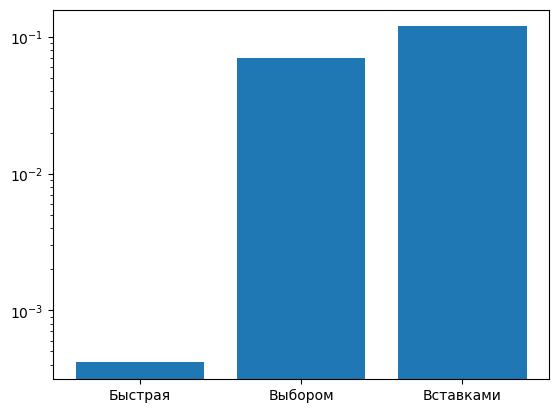

In [132]:
plt.bar(
    ['Вставками', 'Выбором', 'Быстрая'],
    [time_insertion, time_selection, time_quick],
    log=True
)

40. 

In [75]:
class Node:
   def __init__(self, data):
      self.left = None
      self.right = None
      self.data = data

   def insert(self, data):
      if self.data:
         if data < self.data:
            if self.left is None:
               self.left = Node(data)
            else:
               self.left.insert(data)
         elif data > self.data:
            if self.right is None:
               self.right = Node(data)
            else:
               self.right.insert(data)
         else:
            self.data = data

   def PrintTree(self):
      if self.left:
         self.left.PrintTree()
      print(self.data)
      if self.right:
         self.right.PrintTree()

In [97]:
tree = Node(12)
for _ in range(100):
    tree.insert(randint(-100, 100))
tree.PrintTree()

-93
-92
-91
-90
-89
-88
-86
-84
-81
-77
-74
-72
-71
-68
-66
-60
-56
-50
-46
-45
-43
-41
-38
-35
-32
-28
-26
-25
-21
-19
-18
-15
-11
-10
-9
-8
-5
0
1
7
8
11
12
15
18
21
22
25
27
28
29
32
35
36
37
40
41
47
52
53
54
57
60
61
63
67
69
72
79
80
82
83
87
90
93
96
99


In [108]:
def find_leaves(tree):
    if tree.left == None or tree.right == None:
        return [tree.data]
    return find_leaves(tree.left) + find_leaves(tree.right)

In [111]:
find_leaves(tree)

[-92,
 -84,
 -74,
 -68,
 -60,
 -43,
 -32,
 -26,
 -19,
 -15,
 1,
 8,
 15,
 25,
 41,
 52,
 57,
 61,
 69,
 79,
 83,
 90,
 96]

In [27]:
class BinHeap:
    def __init__(self):
        self.heapsize = 0
        self.heaplist = list()
        
        
    def left(self, i):
        return 2 * i + 1
    
    
    def right(self, i):
        return 2 * i + 2
    
    
    def sift_down(self, i):
        while self.left(i) < self.heapsize:
            left = self.left(i)
            right = self.right(i)
            j = left
            if right < self.heapsize and self.heaplist[right] < self.heaplist[left]:
                j = right
            if self.heaplist[i] < self.heaplist[j]:
                break
            self.heaplist[i], self.heaplist[j] = self.heaplist[j], self.heaplist[i]
            i = j
            
            
    def sift_up(self, i):
        parent = (i - 1) // 2
        while self.heaplist[i] < self.heaplist[parent]:
            
            self.heaplist[i], self.heaplist[parent] = self.heaplist[parent], self.heaplist[i]
            i = parent
            parent = (i - 1) // 2
            if i < 0 or parent < 0:
                break
            
            
    
    def add_value(self, value):
        self.heapsize += 1
        self.heaplist.append(value)
        self.sift_up(self.heapsize)
        
        
    def build_heap(self, arr):
        self.heaplist = arr
        self.heapsize = len(arr) - 1
        for i in range(self.heapsize // 2, -1, -1):
            self.sift_down(i)
            
    
    def extract_min(self):
        minn = self.heaplist[0]
        self.heaplist[0] = self.heaplist[self.heapsize - 1]
        self.sift_down(0)
        return minn
    
    def __str__(self) -> str:
        s = ""
        for i in range(1, (self.heapsize//2)+1): 
            s += " parent : "+ str(self.heaplist[i])+" l child : "+ \
                                str(self.heaplist[2 * i])+" r child : "+ \
                                str(self.heaplist[2 * i + 1]) + "\n"
        return s

In [28]:
from random import randint
arr = [randint(-10_000, 30_000) for _ in range(10_000)]
arr

[16343,
 6233,
 17739,
 -6834,
 13153,
 21490,
 5710,
 13070,
 -2300,
 20895,
 -4919,
 1443,
 -7703,
 26361,
 7703,
 -6014,
 3671,
 16721,
 16550,
 -3558,
 9172,
 -6758,
 12164,
 4738,
 22645,
 -495,
 14713,
 12557,
 -3891,
 -8320,
 -2359,
 22082,
 14082,
 20186,
 -3651,
 12862,
 6535,
 -4720,
 -2981,
 28001,
 22349,
 979,
 333,
 8812,
 12939,
 7605,
 8840,
 28108,
 24414,
 19665,
 22755,
 9070,
 -1461,
 -5558,
 14189,
 8015,
 29616,
 26320,
 12135,
 19460,
 6481,
 24223,
 29663,
 26491,
 -6512,
 6919,
 22191,
 8974,
 -5988,
 4017,
 -2587,
 13944,
 3820,
 5663,
 4750,
 7533,
 -9818,
 -4362,
 28358,
 16045,
 -2051,
 18609,
 25521,
 27809,
 28201,
 8305,
 24345,
 -3112,
 17667,
 12098,
 1189,
 9508,
 3887,
 8685,
 4628,
 -1197,
 10994,
 6114,
 29176,
 36,
 -9841,
 15554,
 17116,
 25955,
 -4006,
 15838,
 6327,
 -9890,
 -9341,
 1263,
 10668,
 25874,
 -1902,
 -4834,
 5322,
 -6600,
 -4898,
 -247,
 -3064,
 -4883,
 -1976,
 14466,
 -8487,
 21304,
 25623,
 14786,
 -2353,
 2096,
 3632,
 21394,
 9

In [29]:
arr.sort()

In [30]:
b = BinHeap()
b.build_heap(arr)

In [31]:
print(b)

 parent : -10000 l child : -9999 r child : -9997
 parent : -9999 l child : -9993 r child : -9990
 parent : -9997 l child : -9989 r child : -9988
 parent : -9993 l child : -9987 r child : -9984
 parent : -9990 l child : -9983 r child : -9976
 parent : -9989 l child : -9973 r child : -9970
 parent : -9988 l child : -9961 r child : -9959
 parent : -9987 l child : -9953 r child : -9949
 parent : -9984 l child : -9940 r child : -9940
 parent : -9983 l child : -9930 r child : -9927
 parent : -9976 l child : -9925 r child : -9923
 parent : -9973 l child : -9918 r child : -9915
 parent : -9970 l child : -9911 r child : -9909
 parent : -9961 l child : -9907 r child : -9905
 parent : -9959 l child : -9903 r child : -9902
 parent : -9953 l child : -9900 r child : -9899
 parent : -9949 l child : -9896 r child : -9890
 parent : -9940 l child : -9888 r child : -9888
 parent : -9940 l child : -9887 r child : -9882
 parent : -9930 l child : -9882 r child : -9872
 parent : -9927 l child : -9871 r child

In [33]:
def find_median(lst):
    if not lst:
        return None
    
    mid_idx = (len(lst) - 1) // 2

    if len(lst) % 2 == 0:
        return (lst[mid_idx] + lst[mid_idx + 1]) / 2.0
    else:
        return lst[mid_idx]


In [34]:
find_median(arr)

10199.5

11. <br>а) Создать класс «Продукт» с полями «Название», «Цена», «Количество» и «Срок годности». Создать хеш-таблицу для хранения объектов класса «Продукт» по ключу — названию продукта.<br>б) Написать функцию для нахождения наиболее часто встречающегося ключа в хеш-таблице.<br>в) Реализуйте хеш-таблицу для хранения информации о заказах в ресторане. Ключом является номер заказа, значение — объект, содержащий информацию о заказе (список блюд, стоимость заказа, адрес доставки и т.д.). Используйте метод разрешения коллизий методом цепочек и реализуйте возможность поиска элементов в таблице.

In [9]:
from random import randint
from faker import Faker

In [10]:
fake = Faker("ru_RU")

In [11]:
class Product:
    def __init__(self, name: str, price: str, q: int = None, me: int = None) -> None:
        self.name = name
        self.price = price
        self.q = q
        self.me = me
        
    def __repr__(self) -> str:
        return f"Product(name={self.name}, price={self.price}, quantity={self.q}, month_estimated={self.me})"

In [15]:
products_list = [Product(name=fake.user_name(), price=randint(1, 100)) for _ in range(1000)]
products_list

[Product(name=izotstrelkov, price=40, quantity=None, month_estimated=None),
 Product(name=ypetuhova, price=76, quantity=None, month_estimated=None),
 Product(name=uvarovstanimir, price=1, quantity=None, month_estimated=None),
 Product(name=eduard1998, price=10, quantity=None, month_estimated=None),
 Product(name=nikolaevavalerija, price=23, quantity=None, month_estimated=None),
 Product(name=wgorbacheva, price=48, quantity=None, month_estimated=None),
 Product(name=emil2012, price=19, quantity=None, month_estimated=None),
 Product(name=ernest29, price=99, quantity=None, month_estimated=None),
 Product(name=cteterina, price=21, quantity=None, month_estimated=None),
 Product(name=matve94, price=29, quantity=None, month_estimated=None),
 Product(name=filatovkondrati, price=63, quantity=None, month_estimated=None),
 Product(name=selivan_65, price=43, quantity=None, month_estimated=None),
 Product(name=julija2011, price=86, quantity=None, month_estimated=None),
 Product(name=kiselevamarina,

In [40]:
class Entry:
    def __init__(self, key, item) -> None:
        self.key = key
        self.item = item
    
    def __repr__(self) -> str:
        return f"{self.key} - {self.item}"

class HashTable:
    def __init__(self, size=10**5) -> None:
        self.table = [[],] * 10 ** 5
        self.size = size
        self._used_keys = []
    

    def __getitem__(self, key: str) -> Product:
        if not isinstance(key, str):
            raise TypeError("Ключ обязан быть типа str!")
        
        hashed_key = hash(key) % self.size
        for entry in self.table[hashed_key]:
            if entry.key == key:
                return entry.item
        
        return None

    def __setitem__(self, key: str, value: Product) -> None:
        if not isinstance(key, str):
            raise TypeError("Ключ обязан быть типа str!")
        
        hashed_key = hash(key) % self.size
        for entry in self.table[hashed_key]:
            if entry.key == key:
                entry.item = value
                return
        
        self.table[hashed_key].append(Entry(key, value))
        self._used_keys.append((key, hashed_key))

    def __repr__(self) -> str:
        s = "{\n"
        for key, hashed_key in self._used_keys:
            item = self.table[hashed_key]
            s += f"{key} => {item}\n"
        s += "}"
        return s

In [41]:
d = Dict()
d['sobaka'] = 1
print(d)

{
sobaka => 1
}


In [42]:
d = Dict()

for product in products_list:
    key = product.name
    d[key] = product
d

{
izotstrelkov => Product(name=izotstrelkov, price=40, quantity=None, month_estimated=None)
ypetuhova => Product(name=ypetuhova, price=76, quantity=None, month_estimated=None)
uvarovstanimir => Product(name=uvarovstanimir, price=1, quantity=None, month_estimated=None)
eduard1998 => Product(name=eduard1998, price=10, quantity=None, month_estimated=None)
nikolaevavalerija => Product(name=nikolaevavalerija, price=23, quantity=None, month_estimated=None)
wgorbacheva => Product(name=wgorbacheva, price=48, quantity=None, month_estimated=None)
emil2012 => Product(name=emil2012, price=19, quantity=None, month_estimated=None)
ernest29 => Product(name=ernest29, price=99, quantity=None, month_estimated=None)
cteterina => Product(name=cteterina, price=21, quantity=None, month_estimated=None)
matve94 => Product(name=matve94, price=29, quantity=None, month_estimated=None)
filatovkondrati => Product(name=filatovkondrati, price=63, quantity=None, month_estimated=None)
selivan_65 => Product(name=seliva

In [43]:
from collections import Counter

def get_most_common_key(ht: HashTable) -> str:
    keys = ht._used_keys
    counter = Counter(keys)

    return counter.most_common()[0]

In [44]:
get_most_common_key(d))

(('qtsvetkova', 11756), 2)

в) Реализуйте хеш-таблицу для хранения информации о заказах в ресторане. Ключом является номер заказа, значение — объект, содержащий информацию о заказе (список блюд, стоимость заказа, адрес доставки и т.д.). Используйте метод разрешения коллизий методом цепочек и реализуйте возможность поиска элементов в таблице.

In [45]:
class Order:
    def __init__(self, number: int, list_meal: list, price: int, addres: str) -> None:
        self.number = number
        self.list_meal = list_meal
        self.price = price
        self.addres = addres

    def __repr__(self) -> str:
        return f"Order(number={self.number}, meals={self.list_meal}, price={self.price}, addres={self.addres})"

In [46]:
fake.address()

'к. Саянск, ул. Авиационная, д. 5 стр. 2, 938776'

In [47]:
order_list = [Order(number=randint(1, 10_000), list_meal=['1,213'], price=10, addres=fake.address()) for _ in range(100)]
order_list

[Order(number=6494, meals=['1,213'], price=10, addres=ст. Верхнее Пенжино, бул. Нижний, д. 86, 532682),
 Order(number=9636, meals=['1,213'], price=10, addres=с. Смоленск, пер. Рязанский, д. 834 к. 5, 457252),
 Order(number=8753, meals=['1,213'], price=10, addres=с. Дно, алл. Свободы, д. 32, 186383),
 Order(number=6935, meals=['1,213'], price=10, addres=г. Губаха, пер. Декабристов, д. 75 стр. 54, 884589),
 Order(number=9504, meals=['1,213'], price=10, addres=клх Таганрог, алл. Механизаторов, д. 8/6, 164462),
 Order(number=2814, meals=['1,213'], price=10, addres=клх Котельнич, ул. Восточная, д. 962, 175349),
 Order(number=5559, meals=['1,213'], price=10, addres=г. Элиста, бул. Майский, д. 17, 270978),
 Order(number=8976, meals=['1,213'], price=10, addres=д. Тотьма, бул. Новгородский, д. 4/4, 500668),
 Order(number=1006, meals=['1,213'], price=10, addres=с. Краснотурьинск, наб. Февральская, д. 4 к. 9, 726577),
 Order(number=1549, meals=['1,213'], price=10, addres=клх Рязань, пер. Жданова,

In [48]:
d = HashTable()
for order in order_list:
    key = order.number

    d[str(key)] = order
d

{
6494 => [6494 - Order(number=6494, meals=['1,213'], price=10, addres=ст. Верхнее Пенжино, бул. Нижний, д. 86, 532682), 9636 - Order(number=9636, meals=['1,213'], price=10, addres=с. Смоленск, пер. Рязанский, д. 834 к. 5, 457252), 8753 - Order(number=8753, meals=['1,213'], price=10, addres=с. Дно, алл. Свободы, д. 32, 186383), 6935 - Order(number=6935, meals=['1,213'], price=10, addres=г. Губаха, пер. Декабристов, д. 75 стр. 54, 884589), 9504 - Order(number=9504, meals=['1,213'], price=10, addres=клх Таганрог, алл. Механизаторов, д. 8/6, 164462), 2814 - Order(number=2814, meals=['1,213'], price=10, addres=клх Котельнич, ул. Восточная, д. 962, 175349), 5559 - Order(number=5559, meals=['1,213'], price=10, addres=г. Элиста, бул. Майский, д. 17, 270978), 8976 - Order(number=8976, meals=['1,213'], price=10, addres=д. Тотьма, бул. Новгородский, д. 4/4, 500668), 1006 - Order(number=1006, meals=['1,213'], price=10, addres=с. Краснотурьинск, наб. Февральская, д. 4 к. 9, 726577), 1549 - Order(n